In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
%matplotlib inline

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [101]:
# test vs train dist.. difference especiall Elevation

def compare_dist(ax, feature, i=0):
    sns.kdeplot(train[feature], label = 'train', ax = ax)
    sns.kdeplot(test[feature], label = 'test', ax = ax)
    
    
def numeric_tile(plot_func):
    fig, axs = plt.subplots(2, 5, figsize = (24,6))
    ax = axs.flatten()
    
    for i, (ax, col) in enumerate(zip(axs, train.columns.tolist()[1:11])):
        plot_func(ax, col, i)
        ax.set_title(col)
    plt.tight_layout()
    

In [104]:
#numeric_tile(compare_dist)

In [96]:
features = [col for col in train.columns 
            if not ("Wilderness" in col or "Soil" in col)]

In [97]:
features

['Id',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Cover_Type']

In [5]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [6]:
train.shape

(15120, 56)

### Change From Dummy to Categorical

In [13]:
# preprocessing 1

Widerness_Area = train[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4']]

x = Widerness_Area.stack()

train['Wilderness_Area'] = pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)))

x1 = train[['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']].stack()

train['Soil_Type'] = pd.Series(pd.Categorical(x1[x1!=0].index.get_level_values(1)))

train[['Wilderness_Area', 'Soil_Type']].head()



,Wilderness_Area,Soil_Type
0,Wilderness_Area1,Soil_Type29
1,Wilderness_Area1,Soil_Type29
2,Wilderness_Area1,Soil_Type12
3,Wilderness_Area1,Soil_Type30
4,Wilderness_Area1,Soil_Type29


In [14]:
### Check for missing data
train[train.isnull().any(axis=1)]# seems no missing values

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area,Soil_Type


### EDA

In [15]:
# preprocessing 2
train2 = train.drop(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4','Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'], axis = 1)

In [16]:
train2.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,5,Wilderness_Area1,Soil_Type29
1,2,2590,56,2,212,-6,390,220,235,151,6225,5,Wilderness_Area1,Soil_Type29
2,3,2804,139,9,268,65,3180,234,238,135,6121,2,Wilderness_Area1,Soil_Type12
3,4,2785,155,18,242,118,3090,238,238,122,6211,2,Wilderness_Area1,Soil_Type30
4,5,2595,45,2,153,-1,391,220,234,150,6172,5,Wilderness_Area1,Soil_Type29


In [17]:
train2['Wilderness_num'] = train2['Wilderness_Area'].apply(lambda x:x[-1])

In [18]:
# preprocessing 3
train2['Soil_num'] = train2['Soil_Type'].apply(lambda x:x[9:])

In [22]:
train2.info() # change Wilderness, Soil_type to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 16 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Cover_Type                            15120 non-null int64
Wilderness_Area                       15120 non-null category
Soil_Type                             15120 non-null category
Wilderness_num                        15120 non-null catego

### Categorical features

**Soil Type**

<Figure size 1440x1080 with 0 Axes>

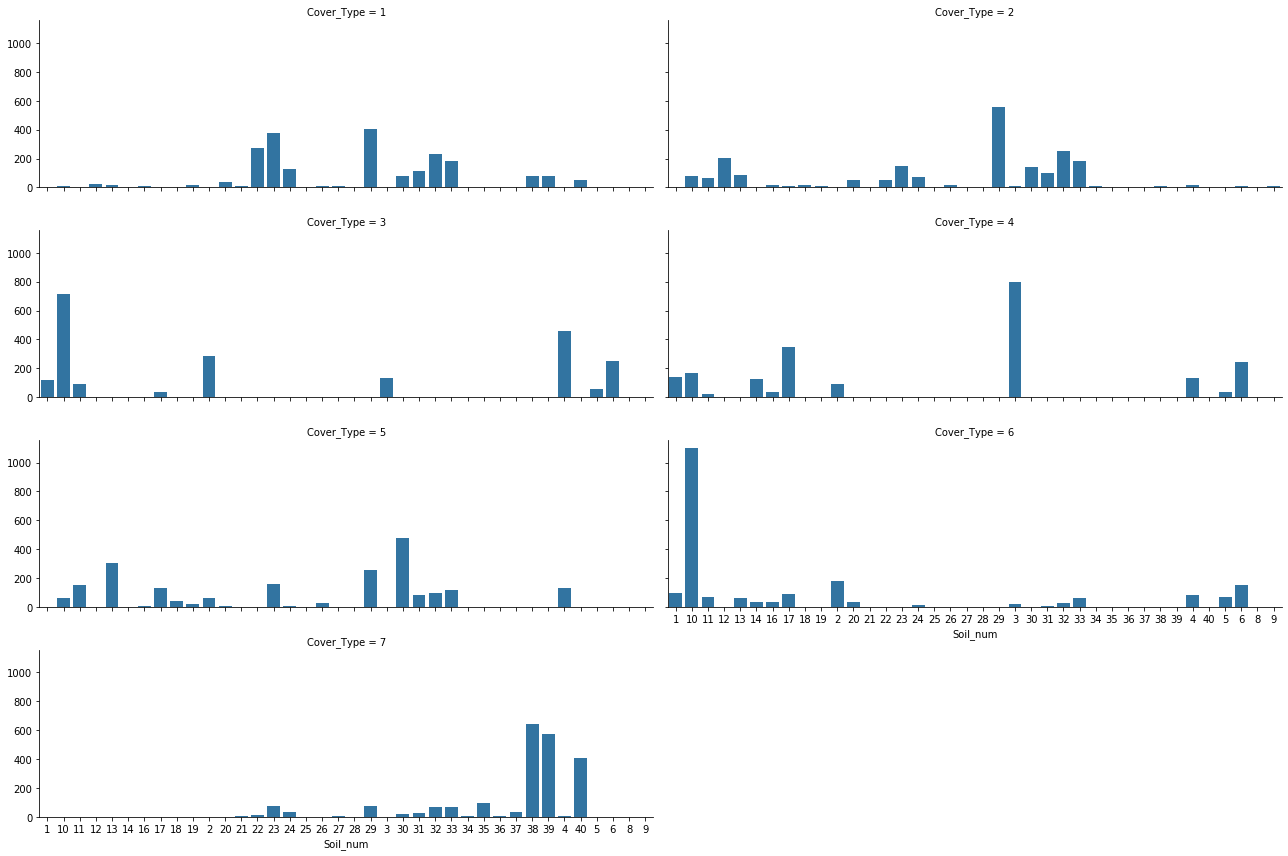

In [33]:
plt.figure(figsize = (20,15))
g = sns.FacetGrid(data = train2, col = 'Cover_Type', aspect = 3, col_wrap = 2, sharex=True)
g.map(sns.countplot, 'Soil_num')

In [29]:
# create a dict that map soil type with rockness
# 0=unknow 1=complex 2=rubbly, 3=stony, 
# 4=very stony, 5=extremely stony 6=extremely bouldery
# preprocessing 4
soils = [
    [7, 15, 8, 14, 16, 17,
     19, 20, 21, 23], #unknow and complex 
    [3, 4, 5, 10, 11, 13],   # rubbly
    [6, 12],    # stony
    [2, 9, 18, 26],      # very stony
    [1, 24, 25, 27, 28, 29, 30,
     31, 32, 33, 34, 36, 37, 38, 
     39, 40, 22, 35], # extremely stony and bouldery
]


soil_dict = dict()
for index, values in enumerate(soils):
    for v in values:
        soil_dict[str(v)] = str(index)
train2['Stony'] = train2['Soil_num'].map(soil_dict)

In [30]:
train2.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type',
       'Wilderness_Area', 'Soil_Type', 'Wilderness_num', 'Soil_num', 'Stony'],
      dtype='object')

<Figure size 1800x1080 with 0 Axes>

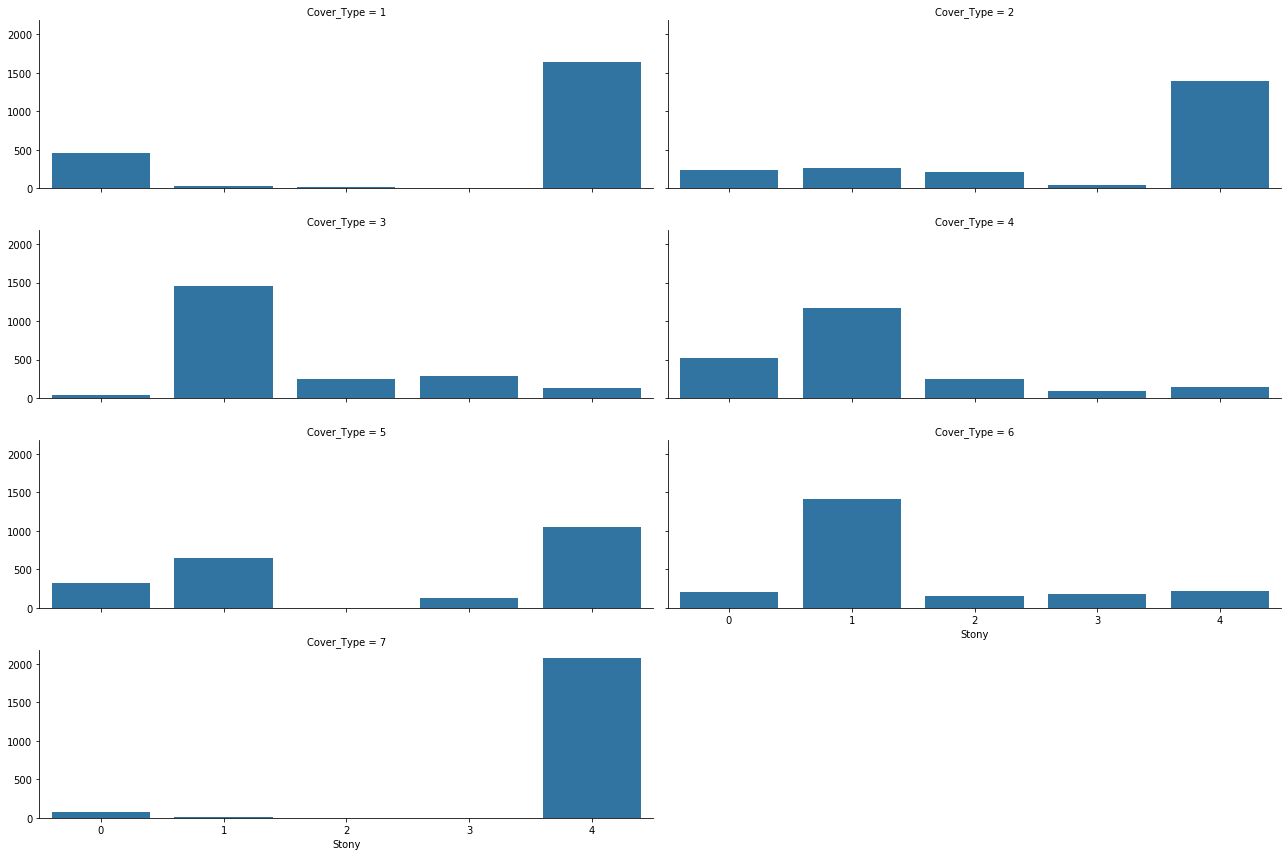

In [32]:
plt.figure(figsize = (25,15))
g = sns.FacetGrid(data = train2, col = 'Cover_Type', aspect = 3, col_wrap = 2)
g.map(sns.countplot, 'Stony', order = ['0','1','2','3','4'])

**Wilderness Area**

<Figure size 1440x1080 with 0 Axes>

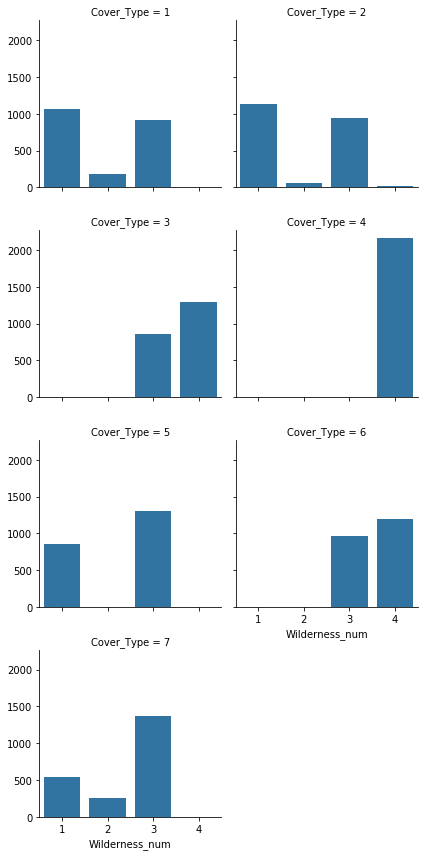

In [34]:
plt.figure(figsize = (20,15))
g = sns.FacetGrid(data = train2, col = 'Cover_Type', col_wrap = 2)
g.map(sns.countplot, 'Wilderness_num')

### Numerical features

**Numerical vs cover_type**

In [35]:
num_cols = train2.select_dtypes(include = 'int64').iloc[:,1:-1].columns
print(num_cols)
print(len(num_cols))

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')
10


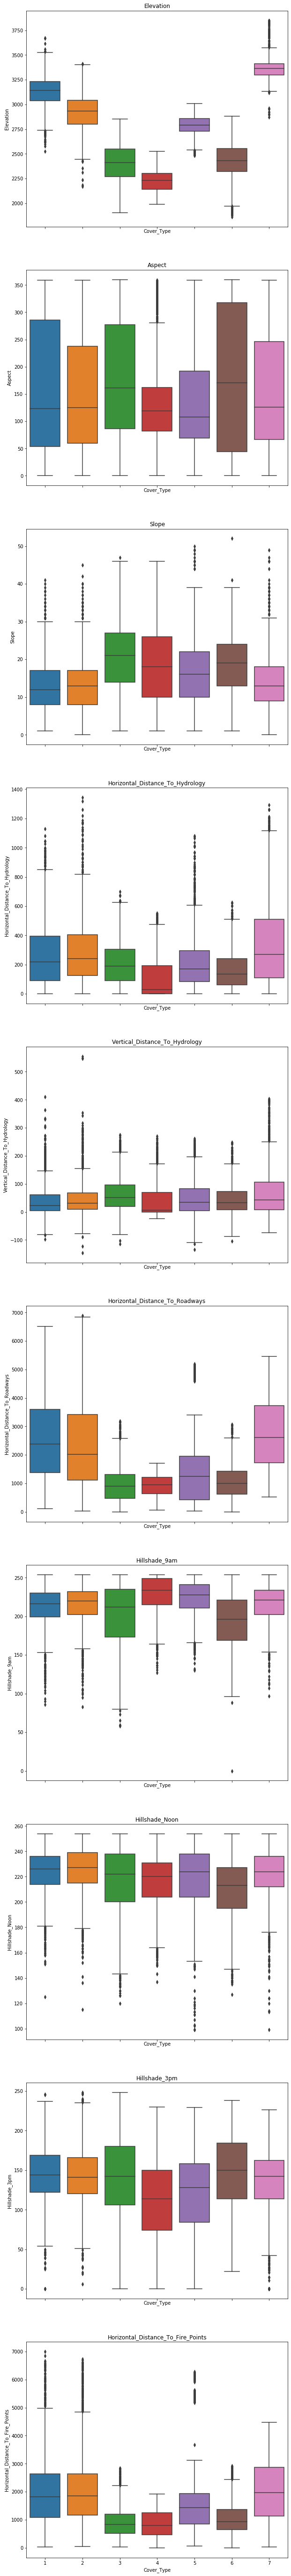

In [37]:
f, axes = plt.subplots(10, sharex = True, figsize = (10,100))
for j in range(len(num_cols)):
    sns.boxplot(data = train2, x = 'Cover_Type', y = num_cols[j], ax = axes[j])
    axes[j].title.set_text(num_cols[j])

**Between numerics**

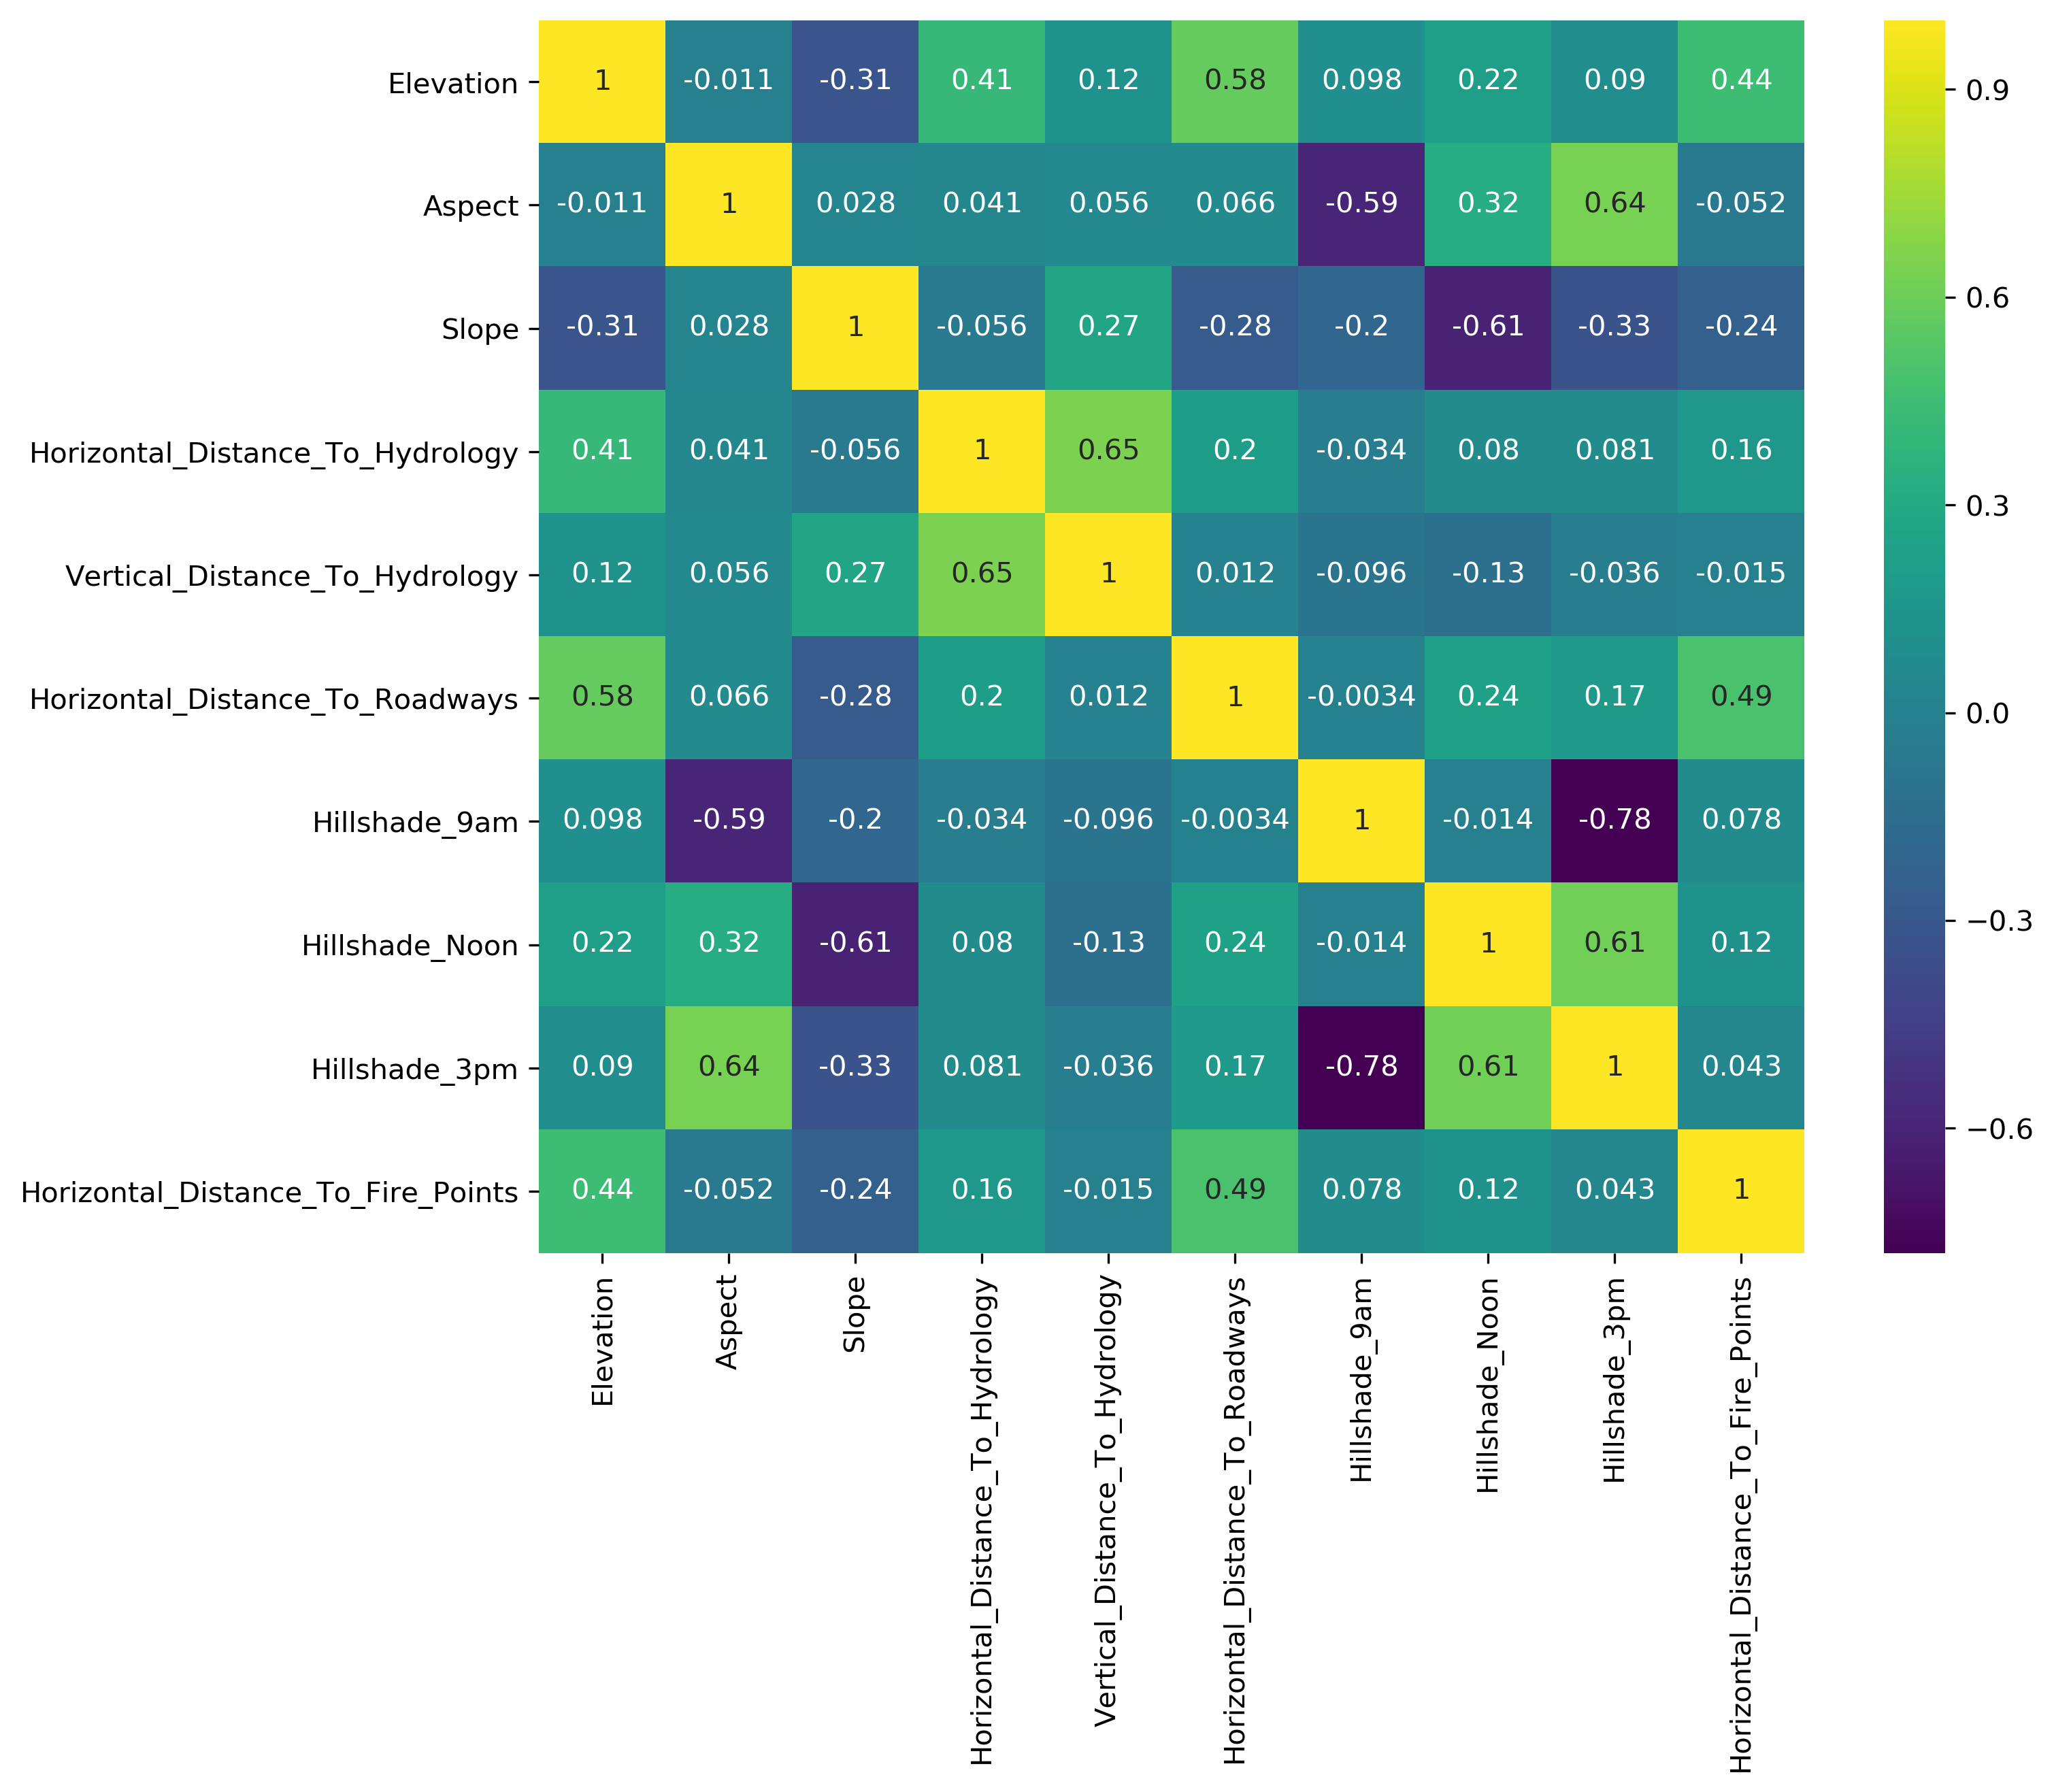

In [38]:
cor1 = train2.select_dtypes(include = 'int64').iloc[:,1:-1].corr()
plt.figure(figsize = (10,8),dpi = 300)
sns.heatmap(cor1, cmap = 'viridis', annot = True)

**Some noticeble relationship**

<Figure size 720x720 with 0 Axes>

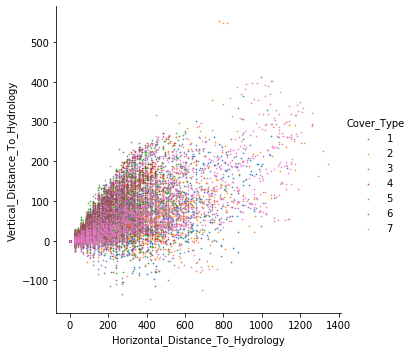

In [39]:

# cor 0.65
plt.figure(figsize = (10,10))
sns.lmplot(data = train2, 
              x = 'Horizontal_Distance_To_Hydrology',
              y = 'Vertical_Distance_To_Hydrology', 
               hue = 'Cover_Type', fit_reg = False,
          scatter_kws={"s": 0.5})

# Both Distances right skewed, most forests grow not far away from water 

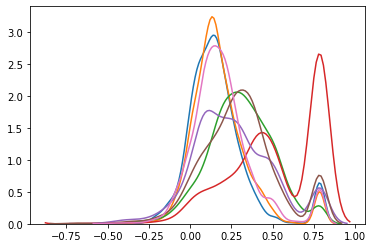

In [41]:
hydro_h = train2["Vertical_Distance_To_Hydrology"]
hydro_v = train2["Horizontal_Distance_To_Hydrology"]

# feature of hydro_arctan
hydro_arctan = np.arctan((hydro_h+0.0001) / (hydro_v+0.0001))
for i in range(1, 8):
    cat = np.where(train2["Cover_Type"] == i)[0]
    sns.kdeplot(hydro_arctan[cat])

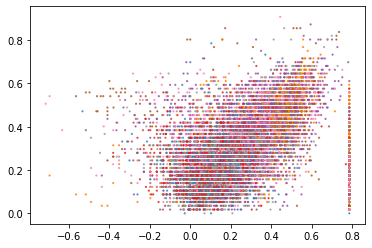

In [42]:
plt.scatter(hydro_arctan,
            np.pi*train2["Slope"]/180, 
            c=train2["Cover_Type"], 
            cmap="Set1", s=1.5, alpha=0.7)

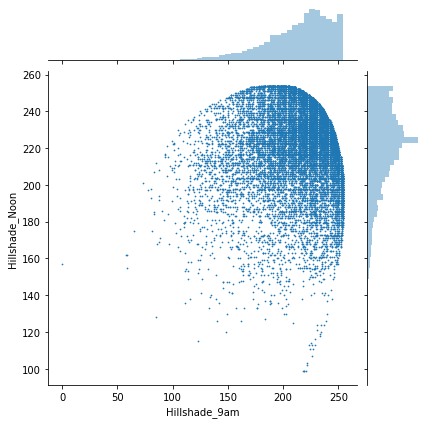

In [43]:
# cor -.014
sns.jointplot(data = train2, x = 'Hillshade_9am', y = 'Hillshade_Noon', s = 0.5)
# looks like they are not independent, they are bounded by an elliptical curve
# both left skewed

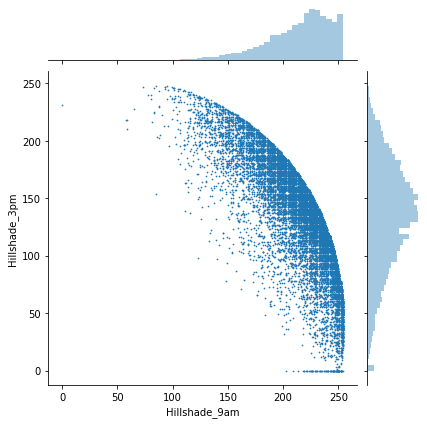

In [44]:
# cor -0.78
sns.jointplot(data = train2, x = 'Hillshade_9am', y = 'Hillshade_3pm', s = 0.5)
# hillshape_3pm symmetrical

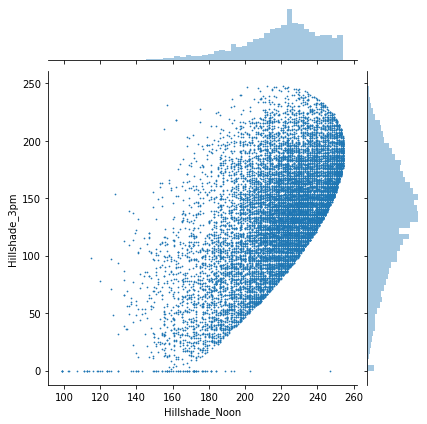

In [45]:
# cor 0.61
sns.jointplot(data = train2, x = 'Hillshade_Noon', y = 'Hillshade_3pm', s = 0.5)


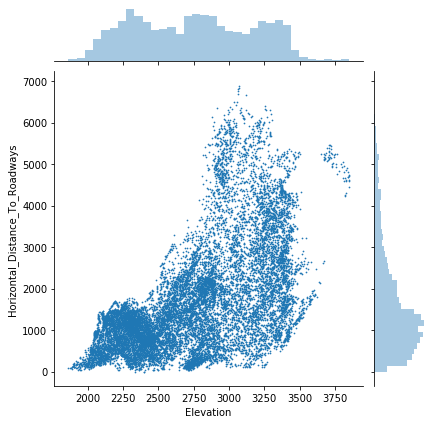

In [46]:
sns.jointplot(data = train2, x = 'Elevation', y = 'Horizontal_Distance_To_Roadways', s = 0.5)

In [120]:
# pairs plot 
# g = sns.PairGrid(train2.select_dtypes(include = 'int64').iloc[:,1:])
# g.map_upper(plt.scatter, s = 0.5)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.distplot)sns.set()


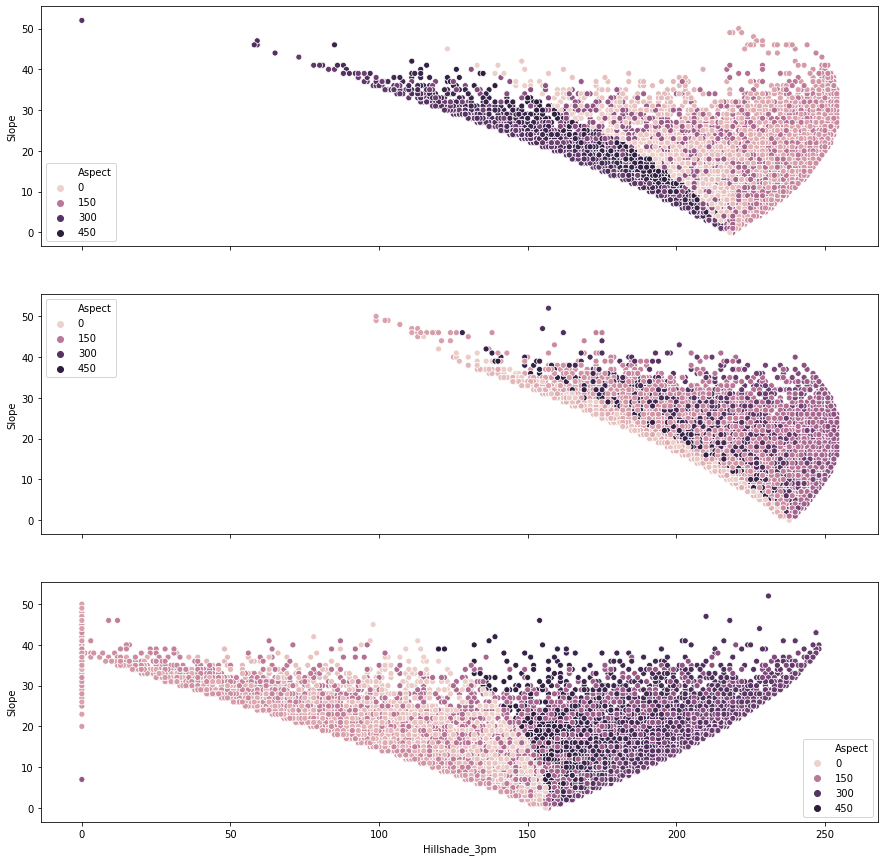

In [47]:
# Hillshade with aspect and slope

f, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True, sharey=True)
sns.scatterplot(y='Slope', x='Hillshade_9am', 
                hue='Aspect', data=train2, ax=axes[0])
sns.scatterplot(y='Slope', x='Hillshade_Noon', 
                hue='Aspect', data=train2, ax=axes[1])
sns.scatterplot(y='Slope', x='Hillshade_3pm', 
                hue='Aspect', data=train2, ax=axes[2])

Hillshade_9am and Hillshade_3pm values flip with regard to Aspect. As slope increase, the differences widen.
In physical geology, aspect is the compass direction that a slope faces.
For example, a slope on the eastern edge of the Rockies toward the Great Plains is described as having an easterly aspect.

In [49]:
# put aspect into directions
# preprocessing 5
def direction(x):
    if (x >=0 and x < 22.5) or (x>=337.5 and x<=360) :
        return 'N'
    elif (x>=22.5 and x<67.5):
        return 'NE'
    elif (x>=67.5 and x<112.5):
        return 'E'
    elif (x>=112.5 and x<157.5):
        return 'SE'
    elif (x>=157.5 and x<202.5):
        return 'S'
    elif (x>=202.5 and x<247.5):
        return 'SW'
    elif (x>=247.5 and x<292.5):
        return 'W'
    elif (x>=292.5 and x<337.5):
        return 'NW'

train2['Aspect_dir'] = train2['Aspect'].apply(direction)

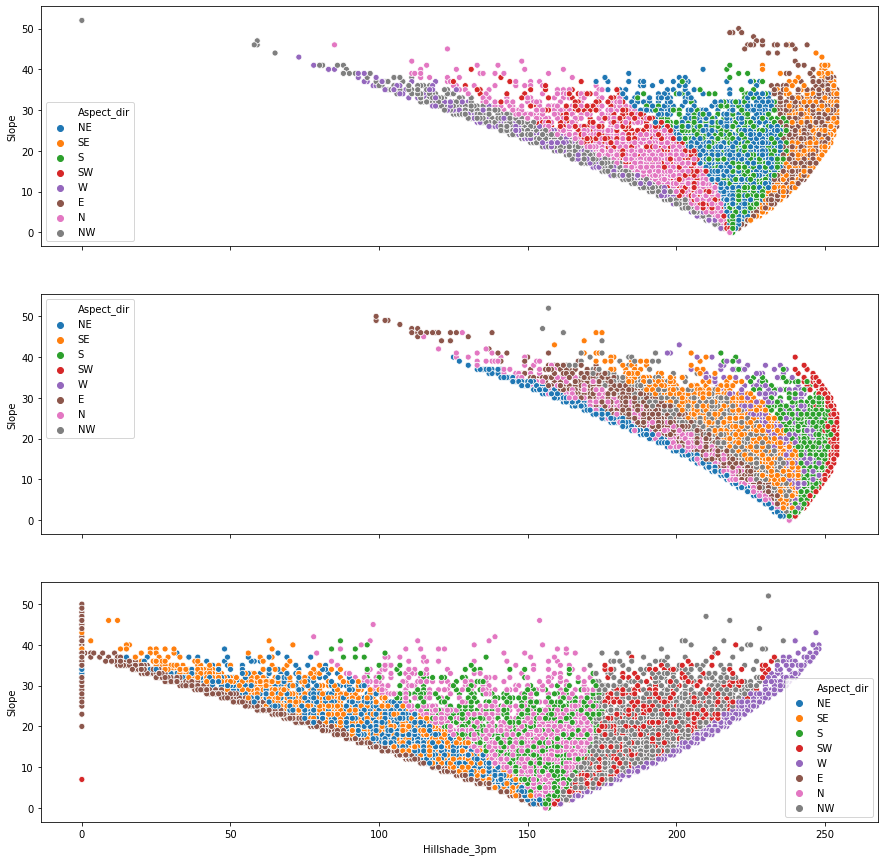

In [50]:
f, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True, sharey=True)
sns.scatterplot(y='Slope', x='Hillshade_9am', 
                hue='Aspect_dir', data=train2, ax=axes[0])
sns.scatterplot(y='Slope', x='Hillshade_Noon', 
                hue='Aspect_dir', data=train2, ax=axes[1])
sns.scatterplot(y='Slope', x='Hillshade_3pm', 
                hue='Aspect_dir', data=train2, ax=axes[2])
# more revealing if change aspect to directions

In [51]:
# change aspect to cos and sin values - may put into preprocessing
# but sin/cos are different for the same direction

train2['Aspect_cos'] = np.cos(np.radians(train2['Aspect']))
train2['Aspect_sin'] = np.sin(np.radians(train2['Aspect']))
# train2['Slope_sin'] = np.sin(np.radians(train2['Slope']))
# train2['Aspectcos_Slope'] = train2['Slope'] * train2['Aspect_cos']
# train2['Aspectsin_Slope'] = train2['Slope'] * train2['Aspect_sin']

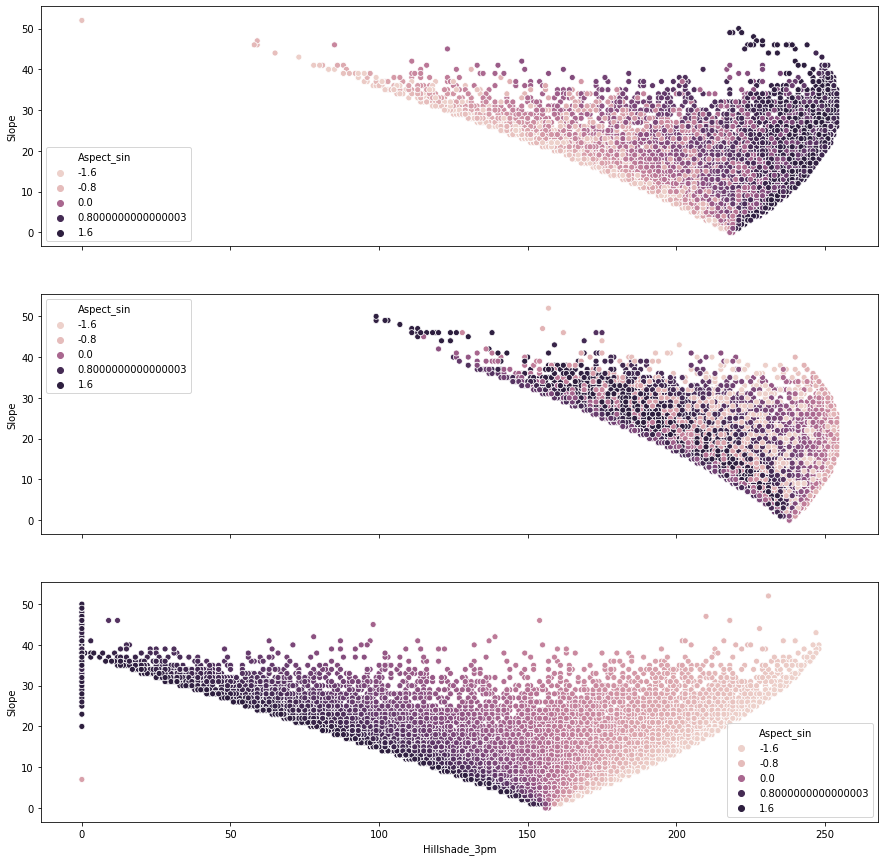

In [52]:
f, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True, sharey=True)
sns.scatterplot(y='Slope', x='Hillshade_9am', 
                hue='Aspect_sin', data=train2, ax=axes[0])
sns.scatterplot(y='Slope', x='Hillshade_Noon', 
                hue='Aspect_sin', data=train2, ax=axes[1])
sns.scatterplot(y='Slope', x='Hillshade_3pm', 
                hue='Aspect_sin', data=train2, ax=axes[2])
    

<Figure size 1440x1080 with 0 Axes>

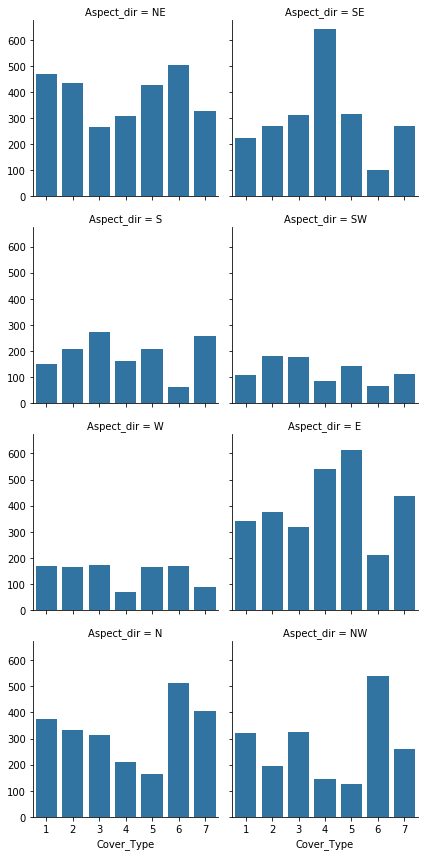

In [53]:
plt.figure(figsize = (20,15))
g = sns.FacetGrid(data = train2, col = 'Aspect_dir', col_wrap = 2)
g.map(sns.countplot, 'Cover_Type')

### Combined Preprocessing in next program.